In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from wrangle import wrangled_zillow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression


import warnings
warnings.filterwarnings('ignore')

In [2]:
train, validate, test = wrangled_zillow()
train.head()

Using cached csv


,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date
14961,3.0,2.5,1913.0,830000.0,1985,OC,8973.00,2017-03-31
33917,4.0,2.0,2171.0,74179.0,1956,OC,1085.74,2017-06-23
29530,3.0,2.0,1880.0,577546.0,1940,LA,6824.84,2017-06-06
37330,2.0,1.0,1548.0,386000.0,1947,LA,5398.68,2017-07-07
26232,4.0,3.0,2034.0,667000.0,2005,VC,7520.44,2017-05-23


- Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tax_value using only area.
    - model = LinearRegression().fit(X, y)
    - predictions = model.predict(X)

In [3]:
# x = area
# y = tax_value 


In [4]:
#for ease of understanding...just use a copy of train and rename

df = train.copy()

#x = df.drop(columns = 'tax_value') #drop target variable
#y = df[['tax_value']] #maintain target variable

#less noise, just choose what you're looking for

x = df['area'] #independent variable
y = df['tax_value'] #dependent variable

In [5]:
#get baseline, baseline is mean of dependent variable yhat_baseline == baseline

baseline = round(df.tax_value.mean(),2)
baseline

364685.12

In [10]:
#create a baseline column
df['baseline'] = round(df.tax_value.mean(), 2)
df.head()


,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date,yhat,residual,baseline
14961,3.0,2.5,1913.0,830000.0,1985,OC,8973.00,2017-03-31,401191.136992,428808.863008,364685.12
33917,4.0,2.0,2171.0,74179.0,1956,OC,1085.74,2017-06-23,444628.829530,-370449.829530,364685.12
29530,3.0,2.0,1880.0,577546.0,1940,LA,6824.84,2017-06-06,395635.153063,181910.846937,364685.12
37330,2.0,1.0,1548.0,386000.0,1947,LA,5398.68,2017-07-07,339738.587473,46261.412527,364685.12
26232,4.0,3.0,2034.0,667000.0,2005,VC,7520.44,2017-05-23,421563.078066,245436.921934,364685.12


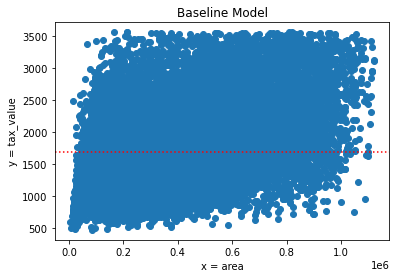

In [11]:
# plot data with baseline:

plt.scatter(df.tax_value, df.area)
plt.axhline(df.area.mean(), ls = ':', c = 'r')
plt.xlabel('x = area')
plt.ylabel('y = tax_value')
plt.title('Baseline Model');

In [12]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize = True)

# fit the model to training data
lm.fit(df[['area']], df.tax_value)

# make prediction
df['yhat'] = lm.predict(df[['area']])

df

,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date,yhat,residual,baseline
14961,3.0,2.5,1913.0,830000.0,1985,OC,8973.00,2017-03-31,401191.136992,428808.863008,364685.12
33917,4.0,2.0,2171.0,74179.0,1956,OC,1085.74,2017-06-23,444628.829530,-370449.829530,364685.12
29530,3.0,2.0,1880.0,577546.0,1940,LA,6824.84,2017-06-06,395635.153063,181910.846937,364685.12
37330,2.0,1.0,1548.0,386000.0,1947,LA,5398.68,2017-07-07,339738.587473,46261.412527,364685.12
26232,4.0,3.0,2034.0,667000.0,2005,VC,7520.44,2017-05-23,421563.078066,245436.921934,364685.12
...,...,...,...,...,...,...,...,...,...,...,...
10735,3.0,2.0,950.0,221861.0,1959,LA,2859.70,2017-03-10,239057.424150,-17196.424150,364685.12
36170,3.0,2.0,1386.0,319465.0,1966,OC,3732.32,2017-06-30,312463.757275,7001.242725,364685.12
16109,3.0,2.0,1768.0,332301.0,1979,LA,4336.85,2017-04-06,376778.480334,-44477.480334,364685.12
26084,2.0,1.0,997.0,169767.0,1940,OC,2161.16,2017-05-23,246970.492171,-77203.492171,364685.12


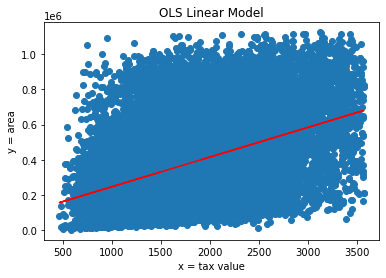

In [13]:
# visualize the line of best fit from OLS linear model
plt.scatter(df.area, df.tax_value)
plt.plot(df.area, df.yhat, c = 'r')
plt.xlabel('x = tax value')
plt.ylabel('y = area')
plt.title('OLS Linear Model');

# Residuals

In [14]:
# residual = actual - predicted
df['residual'] = df.tax_value - df.yhat
df['baseline_residual'] = df.tax_value - df.baseline
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date,yhat,residual,baseline,baseline_residual
14961,3.0,2.5,1913.0,830000.0,1985,OC,8973.00,2017-03-31,401191.136992,428808.863008,364685.12,465314.88
33917,4.0,2.0,2171.0,74179.0,1956,OC,1085.74,2017-06-23,444628.829530,-370449.829530,364685.12,-290506.12
29530,3.0,2.0,1880.0,577546.0,1940,LA,6824.84,2017-06-06,395635.153063,181910.846937,364685.12,212860.88
37330,2.0,1.0,1548.0,386000.0,1947,LA,5398.68,2017-07-07,339738.587473,46261.412527,364685.12,21314.88
26232,4.0,3.0,2034.0,667000.0,2005,VC,7520.44,2017-05-23,421563.078066,245436.921934,364685.12,302314.88


In [15]:
# sum of residual 
round(df.residual.sum(), 4)

# is essentially zero

0.0

In [16]:
# sum of baseline residual
round(df.baseline_residual.sum(), 4)

#is not zero, this is indicitive that if outliers are causing this, using a RobustScalar may get this number closer to zero
#not really actionable at this point

106.92

#### 3) Plot Residuals for the linear regression model you made

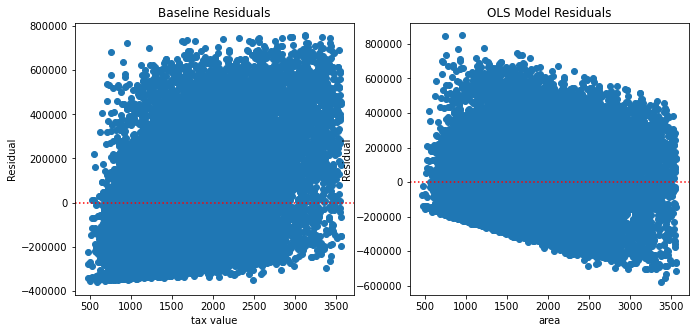

In [17]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.area, df.baseline_residual)
plt.axhline(y = 0, ls = ':', c = 'r')
plt.xlabel('tax value')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.area, df.residual)
plt.axhline(y = 0, ls = ':', c = 'r')
plt.xlabel('area')
plt.ylabel('Residual')
plt.title('OLS Model Residuals');

#takeaway, model beats baseline by a considerable amount

#### 4) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model 

# SSE (Sum of Squared Errors)

In [18]:
# first calculate the square of residuals

df['residual^2'] = df.residual ** 2
df['baseline_residual^2'] = df.baseline_residual ** 2

df.head()

,bedrooms,bathrooms,area,tax_value,year_built,county,tax_amount,transaction_date,yhat,residual,baseline,baseline_residual,residual^2,baseline_residual^2
14961,3.0,2.5,1913.0,830000.0,1985,OC,8973.00,2017-03-31,401191.136992,428808.863008,364685.12,465314.88,1.838770e+11,2.165179e+11
33917,4.0,2.0,2171.0,74179.0,1956,OC,1085.74,2017-06-23,444628.829530,-370449.829530,364685.12,-290506.12,1.372331e+11,8.439381e+10
29530,3.0,2.0,1880.0,577546.0,1940,LA,6824.84,2017-06-06,395635.153063,181910.846937,364685.12,212860.88,3.309156e+10,4.530975e+10
37330,2.0,1.0,1548.0,386000.0,1947,LA,5398.68,2017-07-07,339738.587473,46261.412527,364685.12,21314.88,2.140118e+09,4.543241e+08
26232,4.0,3.0,2034.0,667000.0,2005,VC,7520.44,2017-05-23,421563.078066,245436.921934,364685.12,302314.88,6.023928e+10,9.139429e+10


In [19]:
#lower is better outcome
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

#takeaways SSE is better than baseline bc it is lower

SSE = 1119045921119160.0
SSE Baseline = 1382396018363159.2


In [20]:
#sklearn SSE

SSE2 = mean_squared_error(df.tax_value, df.yhat) * len(df)
SSE2_baseline = mean_squared_error(df.tax_value, df.baseline) * len(df)

print('SSE2 =', "{:.1f}".format(SSE2))
print("SSE2 Baseline =", "{:.1f}".format(SSE2_baseline))

SSE2 = 1119045921119160.0
SSE2 Baseline = 1382396018363159.2


# Explained Sum of Squares (ESS)

In [21]:
ESS = sum((df.yhat - df.tax_value.mean()) ** 2)
ESS

263350097244005.16

# Total Sum of Squares (TSS)

In [22]:
TSS = ESS + SSE
TSS

1382396018363165.2

# MSE (Mean Squared Error)

In [23]:
#manual MSE

MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print('MSE =', '{:.1f}'.format(MSE))
print('MSE Baseline =', '{:.1f}'.format(MSE_baseline))

MSE = 44523192532.8
MSE Baseline = 55001035185.9


In [24]:
#sklearn MSE

MSE2 = mean_squared_error(df.tax_value, df.yhat)
MSE2_baseline = mean_squared_error(df.tax_value, df.baseline) 

print('MSE2 =', '{:.1f}'.format(MSE2))
print('MSE2 Baseline =', '{:.1f}'.format(MSE2_baseline))

MSE2 = 44523192532.8
MSE2 Baseline = 55001035185.9


# RMSE (Root Mean Squared Error)

In [25]:
# manual RMSE

from math import sqrt

RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  211005.2
RMSE baseline =  234523.0


In [26]:
#sklearn RMSE

#calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')

RMSE2 = mean_squared_error(df.tax_value, df.yhat, squared = False)
RMSE2_baseline = mean_squared_error(df.tax_value, df.baseline, squared = False)

print("RMSE = ", "{:.1f}".format(RMSE2))
print("RMSE baseline = ", "{:.1f}".format(RMSE2_baseline))

RMSE =  211005.2
RMSE baseline =  234523.0


# Draw Conclusions

In [27]:
#draw conclusions

df_eval = pd.DataFrame(np.array(['SSE', 'MSE', 'RMSE']), columns = ['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline', 
                                          'MSE_baseline', 
                                          'RMSE_baseline']), 
                                columns = ['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

  metric   model_error
0    SSE  1.119046e+15
1    MSE  4.452319e+10
2   RMSE  2.110052e+05
          metric   model_error
0   SSE_baseline  1.382396e+15
1   MSE_baseline  5.500104e+10
2  RMSE_baseline  2.345230e+05


In [28]:
#use results to select best model, whichever model ends up producing the least amount of error, use that model
# when in doubt, RMSE is best to use

df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,1.119046e+15,-2.633501e+14
1,MSE,4.452319e+10,-1.047784e+10
2,RMSE,2.110052e+05,-2.351780e+04


#### 5) Calculate the sum of squared errors, mean squared error,  and root mean squared error for the baseline model (i.e. a model that always predicts average tax_value)

In [29]:
#using sklearn

#SSE
SSE2_baseline = mean_squared_error(df.tax_value, df.baseline) * len(df)

#MSE
MSE2_baseline = mean_squared_error(df.tax_value, df.baseline) 

#RMSE
RMSE2_baseline = mean_squared_error(df.tax_value, df.baseline, squared = False)


print("SSE Baseline =", "{:.1f}".format(SSE2_baseline))
print('MSE Baseline =', '{:.1f}'.format(MSE2_baseline))
print("RMSE baseline = ", "{:.1f}".format(RMSE2_baseline))

SSE Baseline = 1382396018363159.2
MSE Baseline = 55001035185.9
RMSE baseline =  234523.0


#### 6) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [30]:
if SSE < SSE_baseline:
    print('OLS Regression Model performs better than the baseline model.')
    
else:
    print('OLS Regression Model performs worse than the baseline model.')

OLS Regression Model performs better than the baseline model.


#### 7) What is the amount of variance in the model?

In [31]:
# manual R2

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =  df['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = df['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS


print('R-squared = ', round(R2, 3))
print('Percent of variance in y (tax_value) explained by x (area) =', round(R2 * 100, 1), '%')

R-squared =  0.191
Percent of variance in y (tax_value) explained by x (area) = 19.1 %


In [32]:
# sklearn r2
from sklearn.metrics import r2_score

r2_score(df.tax_value, df.yhat)

0.1905026444996719

In [33]:
from sklearn.metrics import explained_variance_score 

evs = explained_variance_score(df.tax_value, df.yhat)
print('Explained Variance = ', round(evs, 3))

Explained Variance =  0.191


#### 8) Is the model better than the baseline model?

In [34]:
SSE < SSE_baseline

True

#### 9) Create a file named evaluate.py that contains the following functions: 
- plot_residuals(y, yhat):creates a residual plot
- regression_errors(y, yhat): returns the following values:

    - sum of squares (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
    
- baseline_mean_errors(y): computes SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [58]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':', colors = 'r')
    plt.scatter(actual, residuals)
    plt.ylabel('Residual ($y - \hat{y}$)')
    plt.xlabel('Actual Value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [41]:
#def residuals for manual calc
def residuals(actual, predicted):
    return actual - predicted

# manually define: sse, mse, rmse, ess, tss, r2_score 

def sse(actual, predicted):
    return (residuals(actual, predicted) ** 2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    #import math module to ensure function runs
    import math
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)


#return  a series with sse, ess, tss, mse, and rmse
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

#return sse, mse, rmse
def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }


def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    if rmse_model < rmse_baseline:
        print('OLS Regression Model performs better than the baseline model.')
    
    else:
        print('OLS Regression Model performs worse than the baseline model.')
    return rmse_model < rmse_baseline

In [56]:
better_than_baseline(df.tax_value, df.yhat)

OLS Regression Model performs better than the baseline model.


True

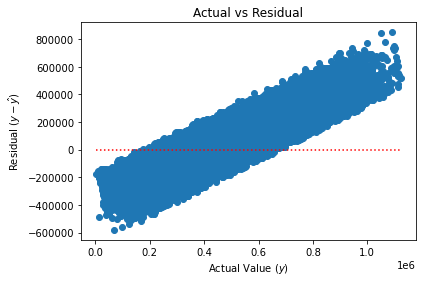

In [59]:
plot_residuals(df.tax_value, df.yhat)